In [6]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets

# Suppress warning messages
warnings.filterwarnings("ignore", category=UserWarning)

# Custom styles for seaborn
sns.set_style("darkgrid")
sns.set_palette("husl")

## Data Exploration

In [7]:
# Load the dataset
cars_data = pd.read_csv('app\original_dataset.csv')
cars_data.head()

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\payal bansal\AppData\Local\Temp\ipykernel_11964\3833171979.py:2: SyntaxWarning: invalid escape sequence '\o'
  cars_data = pd.read_csv('app\original_dataset.csv')


,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
0,1079071571,fresh import Passo 2021model,Toyota,Passo,2021,54000,4190000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Airline Avenue, Islamabad","it's 2021 model fresh import, perfect engine s...","ABS, Air Bags, AM/FM Radio, CD Player, Cassett...",['https://images.olx.com.pk/thumbnails/4039460...,https://www.olx.com.pk/item/fresh-import-passo...
1,1080125520,Suzuki ravi,Suzuki,Ravi,2018,95000,1300000,Petrol,Karachi,Original,Local,Manual,Used,"Kahuta, Rawalpindi",Suzuki ravi 2018 col,AM/FM Radio,['https://images.olx.com.pk/thumbnails/4102504...,https://www.olx.com.pk/item/suzuki-ravi-iid-10...
2,1080748789,Suzuki bolan 2015 contact 03112271054,Suzuki,Bolan,2015,50000,800000,Petrol,Karachi,Original,Local,Manual,Used,"Lyari Expressway, Karachi",Suzuki bolan model 2015 reg 2022 ghadi me koi ...,Rear speakers,['https://images.olx.com.pk/thumbnails/4139520...,https://www.olx.com.pk/item/suzuki-bolan-2015-...
3,1076081635,Diahatsu Move 2013,Daihatsu,Move,2013,94000,2155000,Petrol,Lahore,Original,Imported,Automatic,Used,"New Amir Town, Lahore",Move Push start \nHome Used car. \nModel 2013....,"ABS, Air Bags, Air Conditioning, Alloy Rims, A...",['https://images.olx.com.pk/thumbnails/3865337...,https://www.olx.com.pk/item/diahatsu-move-2013...
4,1080812928,Suzuki Swift DLX 2011 miner tuchap,Suzuki,Swift,2011,126544,1440000,Petrol,Karachi,Original,Local,Manual,Used,"Shadman 2, Karachi",Suzuki Swift DLX\nAbS Break 100%\nengine 100%\...,"ABS, Air Conditioning, Alloy Rims, AM/FM Radio...",['https://images.olx.com.pk/thumbnails/4143509...,https://www.olx.com.pk/item/suzuki-swift-dlx-2...


In [8]:
# Summary statistics
cars_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad ID,9179.0,1.079720e+09,2.848393e+06,1.019824e+09,1.080003e+09,1.080543e+09,1.080773e+09,1.080975e+09
Year,9179.0,2.012269e+03,6.043902e+00,1.989000e+03,2.007000e+03,2.013000e+03,2.017000e+03,2.024000e+03
KM's driven,9179.0,9.657042e+04,6.198325e+04,1.000000e+00,5.300000e+04,9.200000e+04,1.250000e+05,5.335280e+05
Price,9179.0,2.036814e+06,1.159302e+06,1.850000e+05,1.025000e+06,1.820000e+06,2.750000e+06,5.000000e+06


In [9]:
# Information about the data
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9179 entries, 0 to 9178
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ad ID              9179 non-null   int64 
 1   Car Name           9179 non-null   object
 2   Make               9179 non-null   object
 3   Model              9179 non-null   object
 4   Year               9179 non-null   int64 
 5   KM's driven        9179 non-null   int64 
 6   Price              9179 non-null   int64 
 7   Fuel               9179 non-null   object
 8   Registration city  9179 non-null   object
 9   Car documents      9179 non-null   object
 10  Assembly           9179 non-null   object
 11  Transmission       9179 non-null   object
 12  Condition          9179 non-null   object
 13  Seller Location    9179 non-null   object
 14  Description        9179 non-null   object
 15  Car Features       9179 non-null   object
 16  Images URL's       9179 non-null   object


In [10]:
# Check for missing values
cars_data.isnull().sum()

Ad ID                  0
Car Name               0
Make                   0
Model                  0
Year                   0
KM's driven            0
Price                  0
Fuel                   0
Registration city      0
Car documents          0
Assembly               0
Transmission           0
Condition              0
Seller Location        0
Description            0
Car Features           0
Images URL's           0
Car Profile          458
dtype: int64

In [11]:
# Get the number of duplicated
cars_data.duplicated().sum()

np.int64(201)

In [12]:
# Check for duplicate rows
duplicate_rows = cars_data[cars_data.duplicated()]
duplicate_rows

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
606,1080680578,Honda City i-Vtec 2019 - 03338882154,Honda,City IVTEC,2019,60000,3875000,Petrol,Karachi,Original,Local,Automatic,Used,"Tariq Road, Karachi",Honda City i-Vtec\nProsmatic (Automatic Transm...,Air Conditioning,['https://images.olx.com.pk/thumbnails/4135504...,https://www.olx.com.pk/item/honda-city-i-vtec-...
1260,1080776157,Suzuki Swift DLX 1.3 2017,Suzuki,Swift,2017,71000,2200000,Petrol,Lahore,Original,Local,Manual,Used,"Gulistan-e-Jauhar Block 10, Karachi",- Inspection Done\n- Number plates available\n...,"ABS, Air Conditioning, Alloy Rims, Front Speak...",['https://images.olx.com.pk/thumbnails/4141220...,https://www.olx.com.pk/item/suzuki-swift-dlx-1...
1451,1080680013,Honda city 1.3 atomitc,Honda,City IVTEC,2020,174000,3650000,Petrol,Lahore,Original,Local,Automatic,Used,"Hassan Town, Lahore",1. . 3 auto 1sy ownar chat pilfer original bac...,"ABS, Air Bags, AM/FM Radio, CD Player, DVD Pla...",['https://images.olx.com.pk/thumbnails/4135468...,https://www.olx.com.pk/item/honda-city-13-atom...
1480,1079847956,Suzuki cultus new condition car best fuel average,Suzuki,Cultus VXR,2014,77700,1425000,Petrol,Lahore,Original,Local,Manual,Used,"G-15 Markaz, Islamabad",just like new car no work required best fuel a...,"Air Conditioning, AM/FM Radio, CD Player, Cass...",['https://images.olx.com.pk/thumbnails/4085974...,https://www.olx.com.pk/item/suzuki-cultus-new-...
1531,1080852737,genion santro own name,Hyundai,Santro,2003,194857,720000,Petrol,Karachi,Original,Local,Manual,Used,"Mohlanwal, Lahore",final 670\n200% non accedental car\nengine 100...,"AM/FM Radio, DVD Player, Front Speakers, USB a...",['https://images.olx.com.pk/thumbnails/4147219...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9099,1080315225,2018 in good condition,Suzuki,Mehran VXR,2018,96000,1395000,Petrol,Lahore,Original,Local,Manual,Used,"Westridge, Rawalpindi",2018 model lahore number Grey colour . in good...,"Air Conditioning, AM/FM Radio",['https://images.olx.com.pk/thumbnails/4167060...,https://www.olx.com.pk/item/2018-in-good-condi...
9105,1080195710,toyota Yaris Gli,Toyota,Yaris,2020,40000,3575000,Petrol,Islamabad,Original,Local,Manual,Used,"Saddar, Rawalpindi",Full urgent sale cash required \nIslamabad num...,"ABS, Air Bags, Air Conditioning, AM/FM Radio, ...",['https://images.olx.com.pk/thumbnails/4106641...,https://www.olx.com.pk/item/toyota-yaris-gli-i...
9121,1080824857,Govt. Officer Wagon R VXL,Suzuki,Wagon R,2019,47500,2295000,Petrol,Lahore,Original,Local,Manual,Used,"Gajju Matah, Lahore",Govt. Officer used VXL car\nTotal Genuine \n10...,"Air Conditioning, Alloy Rims, AM/FM Radio, Fro...",['https://images.olx.com.pk/thumbnails/4144191...,https://www.olx.com.pk/item/govt-officer-wagon...
9148,1080360303,suzuki cultus Model 2010,Suzuki,Cultus VXR,2010,1234,985000,Petrol,Karachi,Original,Local,Manual,Used,"Gulistan-e-Jauhar Block 11, Karachi",suzuki cultus VXR Model 2010\nouter minor Show...,"Alloy Rims, CD Player, DVD Player, Front Speak...",['https://images.olx.com.pk/thumbnails/4116585...,https://www.olx.com.pk/item/suzuki-cultus-mode...


In [13]:
# Display an example of the duplicated rows
cars_data[cars_data['Ad ID']==1080680578]

,Ad ID,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car documents,Assembly,Transmission,Condition,Seller Location,Description,Car Features,Images URL's,Car Profile
324,1080680578,Honda City i-Vtec 2019 - 03338882154,Honda,City IVTEC,2019,60000,3875000,Petrol,Karachi,Original,Local,Automatic,Used,"Tariq Road, Karachi",Honda City i-Vtec\nProsmatic (Automatic Transm...,Air Conditioning,['https://images.olx.com.pk/thumbnails/4135504...,https://www.olx.com.pk/item/honda-city-i-vtec-...
606,1080680578,Honda City i-Vtec 2019 - 03338882154,Honda,City IVTEC,2019,60000,3875000,Petrol,Karachi,Original,Local,Automatic,Used,"Tariq Road, Karachi",Honda City i-Vtec\nProsmatic (Automatic Transm...,Air Conditioning,['https://images.olx.com.pk/thumbnails/4135504...,https://www.olx.com.pk/item/honda-city-i-vtec-...


## Data Preprocessing

In [14]:
# Remove duplicate rows
cars_data = cars_data.drop_duplicates()

# Confirm removal of duplicate rows
print("After removing duplicates:")
cars_data.shape

After removing duplicates:


(8978, 18)

In [15]:
# Get the unique values of the categorial columns
for column in cars_data.columns[:-2]:
    if cars_data[column].dtype == 'object':
        print(f"Number of the unique values in '{column}' column is: {cars_data[column].nunique()}")
        print(f"Unique values in {column}:")
        print(cars_data[column].unique())
        print()

Number of the unique values in 'Car Name' column is: 7970
Unique values in Car Name:
['fresh import Passo 2021model' 'Suzuki ravi'
 'Suzuki bolan 2015 contact 03112271054' ...
 'Suzuki Wagon R Japanese 660cc sale/exchange' 'wegon R VXL 2017'
 'Move Custom']

Number of the unique values in 'Make' column is: 11
Unique values in Make:
['Toyota' 'Suzuki' 'Daihatsu' 'Honda' 'Hyundai' 'Mitsubishi' 'KIA'
 'Changan' 'FAW' 'Mercedes' 'Chevrolet']

Number of the unique values in 'Model' column is: 58
Unique values in Model:
['Passo' 'Ravi' 'Bolan' 'Move' 'Swift' 'Wagon R' 'Mira' 'City IDSI'
 'Cultus VXR' 'Every' 'Corolla XLI' 'Baleno' 'City Vario' 'Terios Kid'
 'Civic Prosmetic' 'City IVTEC' 'Santro' 'Corrolla Altis' 'City Aspire'
 'Mehran VXR' 'Cuore' 'Pajero Mini' 'Picanto' 'Alto' 'Karvaan' 'X-PV'
 'Hijet' 'Ek Wagon' 'Altis Grande' 'E Class' 'Yaris' 'Lancer'
 'Corolla GLI' 'Joy' 'Civic Oriel' 'Classic' 'Spectra' 'V2'
 'Minicab Bravo' 'Corolla Assista' 'Alsvin' 'C Class' 'Minica' 'Exclusive'
 '

In [16]:
# Rename 'Car documents' column
cars_data.rename(columns={'Car documents': 'Car Documents'}, inplace=True)

In [17]:
# Calculate age of each car
current_year = datetime.datetime.now().year
cars_data['Age'] = current_year - cars_data['Year']

In [18]:
# Drop the unnecessary columns
cars_data = cars_data.drop(columns=['Ad ID', 'Images URL\'s', 'Car Profile'])

In [19]:
# Shuffle the data
cars_data = cars_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [20]:
# Split the 'Car Features' column and explode it to create a Series
car_features_series = cars_data['Car Features'].str.split(', ').explode()

# Get the value counts of each feature
feature_counts = car_features_series.value_counts()

# Extract the top 5 most common features
top_5_features = feature_counts.head(5)
top_5_features

Car Features
Air Conditioning    6470
AM/FM Radio         5612
Power Steering      5256
Front Speakers      4820
Power Locks         4728
Name: count, dtype: int64

In [21]:
# List of most existed features
most_existed_features = top_5_features.index

# Create columns for each feature and initialize with zeros
for feature in most_existed_features:
    cars_data[feature] = 0

# Iterate over each record and update the new columns accordingly
for index, row in cars_data.iterrows():
    features = row['Car Features'].split(', ')
    for feature in features:
        if feature in most_existed_features:
            cars_data.at[index, feature] = 1

# Drop the original 'Car Features' column
cars_data.drop(columns=['Car Features'], inplace=True)

In [22]:
cars_data.head()

,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car Documents,Assembly,Transmission,Condition,Seller Location,Description,Age,Air Conditioning,AM/FM Radio,Power Steering,Front Speakers,Power Locks
0,suzuki alto vxr 660 cc,Suzuki,Alto,2019,60000,2100000,Petrol,Karachi,Original,Local,Manual,Used,"Aisha Manzil, Karachi",suzuki alto vxr 660 for sale \ncompany mainten...,6,1,1,0,0,0
1,Suzuki Swift DLX 2016,Suzuki,Swift,2016,74000,2225000,Petrol,Lahore,Original,Local,Manual,Used,"Gulberg 3, Lahore",excellent condition\neach and everything is in...,9,1,1,1,1,0
2,DAIHATSU MIRA E S\nModel 2022\n2023 Fresh Impo...,Daihatsu,Mira,2022,8000,3800000,Petrol,Unregistered,Original,Imported,Automatic,Used,"Shabqadar Road, Shabqadar",DAIHATSU MIRA E S\nModel 2022\n2023 Fresh Impo...,3,1,1,1,1,1
3,Swift for sell model. 2015,Suzuki,Swift,2015,120000,2440000,Petrol,Islamabad,Original,Local,Manual,Used,"Lehtarar Road, Islamabad",Swift car for sale in good condition and Islam...,10,0,1,1,0,0
4,Alsvin DCT Lumiere,Changan,Alsvin,2022,11000,4510000,Petrol,Islamabad,Original,Local,Automatic,Used,"F-10 Markaz, Islamabad","Excellent condition, very less used by PAF off...",3,1,1,0,1,1


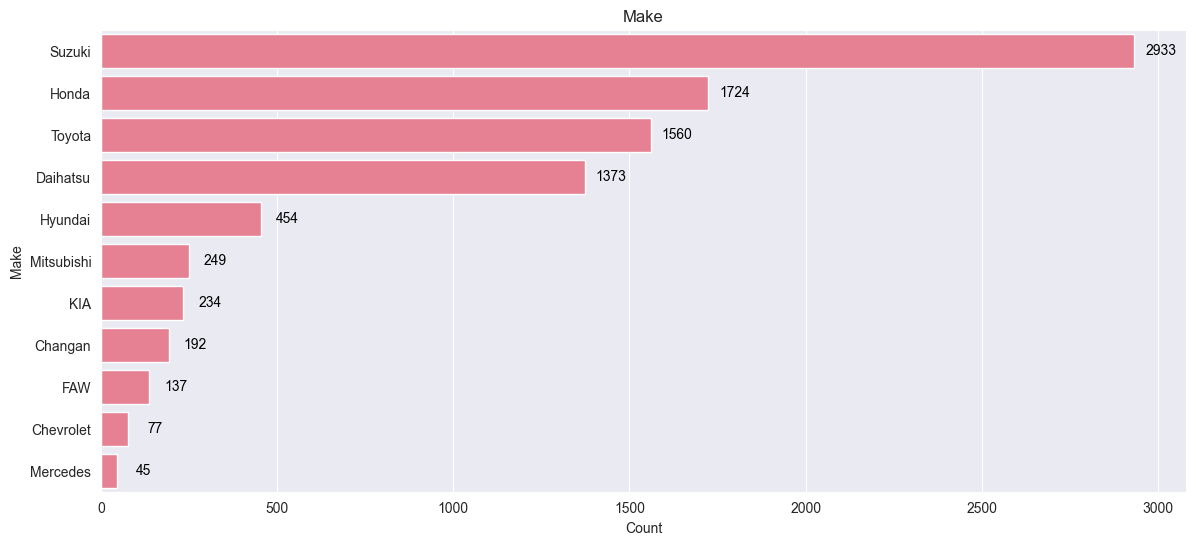

In [23]:
# Bar plot for 'Make' column
plt.figure(figsize=(14, 6))
ax = sns.countplot(y='Make', data=cars_data, order=cars_data['Make'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Make')
plt.title('Make')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 75, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black')

plt.show()

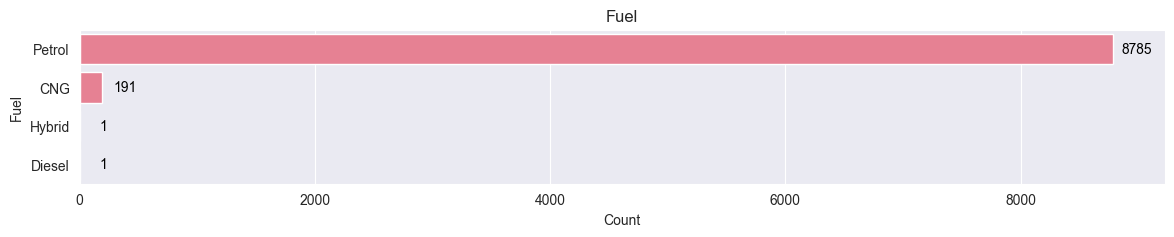

In [24]:
# Bar plot for 'Make' column
plt.figure(figsize=(14, 2))
ax = sns.countplot(y='Fuel', data=cars_data, order=cars_data['Fuel'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Fuel')
plt.title('Fuel')

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width() + 200, p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black')

plt.show()

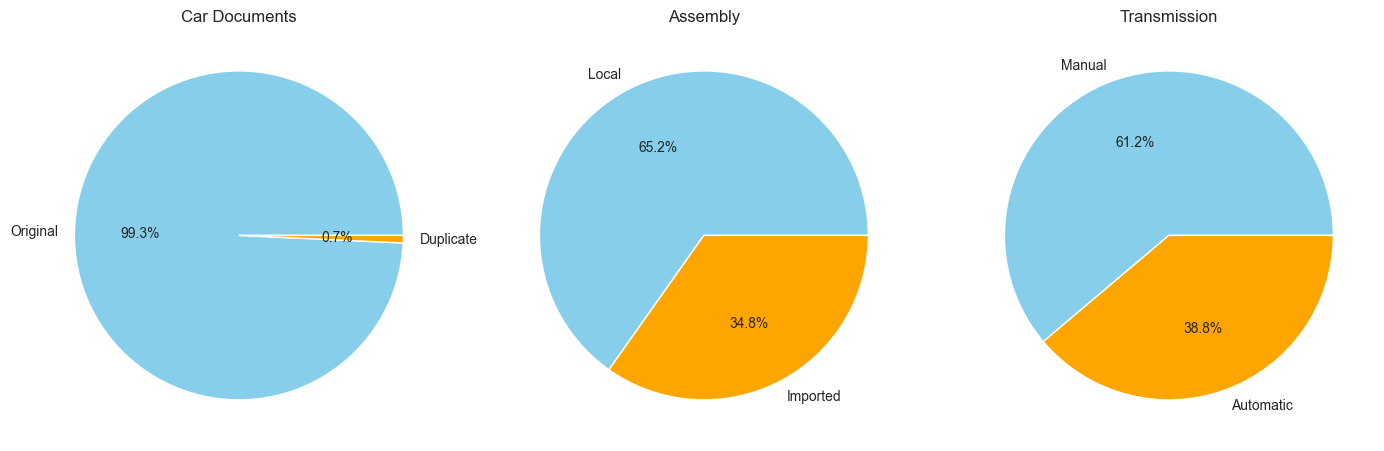

In [25]:
# Pie plots for other categorical columns
plt.figure(figsize=(14, 6))
categorical_columns = ['Car Documents', 'Assembly', 'Transmission']
for i, column in enumerate(categorical_columns, start=1):
    plt.subplot(1, 3, i)
    cars_data[column].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange'])
    plt.ylabel('')
    plt.title(column)

plt.tight_layout()
plt.show()

In [26]:
# Select the features relevant for recommendation
features = cars_data[['Make', 'Model', 'Age', "KM's driven", 'Price', 'Fuel', 'Car Documents', 'Assembly', 'Transmission', 'Air Conditioning', 'AM/FM Radio', 'Power Steering', 'Front Speakers', 'Power Locks']]

# Perform one-hot encoding for categorical features
categorical_cols = ['Make', 'Model', 'Fuel', 'Car Documents', 'Assembly', 'Transmission']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features[categorical_cols])
encoded_features_array = encoded_features.toarray()

# Scale numerical features
numerical_cols = ['Age', "KM's driven", 'Price']
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(features[numerical_cols])

# Combine encoded categorical features and scaled numerical features
all_features = np.concatenate((encoded_features_array, scaled_numerical_features, features[['Air Conditioning', 'AM/FM Radio', 'Power Steering', 'Front Speakers', 'Power Locks']].values), axis=1)

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(all_features)

# Function to get similar cars based on user input for a specific make and model
def get_top_similar_cars_user_input(user_input, similarity_matrix):
    # Encode user input
    user_encoded = encoder.transform([[user_input['Make'], user_input['Model'], user_input['Fuel'], user_input['Car Documents'], user_input['Assembly'], user_input['Transmission']]])
    # Scale numerical features of user input
    user_numerical_features = scaler.transform([[user_input['Age'], user_input["KM's driven"], user_input['Price']]])
    # Combine encoded categorical features and scaled numerical features
    user_input_features = np.concatenate((user_encoded.toarray(), user_numerical_features, np.array([[user_input[feature] for feature in ['Air Conditioning', 'AM/FM Radio', 'Power Steering', 'Front Speakers', 'Power Locks']]])), axis=1)
    # Compute similarity scores between user input and all cars
    similarity_scores = cosine_similarity(user_input_features, all_features)
    
    # Get the indices of similar cars
    similar_car_indices = similarity_scores.argsort()[0][::-1]
    
    # Filter the results based on the selected make and model
    similar_cars = cars_data.loc[similar_car_indices]
    similar_cars = similar_cars[(similar_cars['Make'] == user_input['Make']) & (similar_cars['Model'] == user_input['Model'])]
    
    return similar_cars[['Make', 'Model', 'Year', 'Price', 'Description']]

In [27]:
# Example: Recommend cars similar to the user input
user_input = {
    'Make': 'Changan',
    'Model': 'Alsvin',
    'Age': 5,
    "KM's driven": 80000,
    'Price': 2400000,
    'Fuel': 'Petrol',
    'Car Documents': 'Original',
    'Assembly': 'Local',
    'Transmission': 'Automatic',
    'Air Conditioning': 1,
    'AM/FM Radio': 1,
    'Power Steering': 1,
    'Front Speakers': 1,
    'Power Locks': 0
}

# Print the top recommended cars based on user input
top_similar_cars_indices = get_top_similar_cars_user_input(user_input, similarity_matrix)
print("Shape of top_similar_cars_indices:", top_similar_cars_indices.shape)
print("Content of top_similar_cars_indices:")
top_similar_cars_indices

Shape of top_similar_cars_indices: (91, 5)
Content of top_similar_cars_indices:


,Make,Model,Year,Price,Description
5572,Changan,Alsvin,2021,3275000,i want to sale this car\nits full options car
4346,Changan,Alsvin,2021,3250000,alsvin lumier full option brand new car like s...
2059,Changan,Alsvin,2021,3400000,changan alsvin\n 100% full original. \n2nd own...
5190,Changan,Alsvin,2022,3500000,Everything in perfect and working condition
466,Changan,Alsvin,2021,3650000,Everything is in genuine condition. As good as...
...,...,...,...,...,...
2399,Changan,Alsvin,2021,3450000,total guanine car including bumpers . . black ...
3565,Changan,Alsvin,2021,3645000,Changan Alsvin for sale. The car is total genu...
5495,Changan,Alsvin,2022,3900000,1500 CC Engine Automatic Transmission \n16500 ...
6357,Changan,Alsvin,2021,3200000,alsvin for sale\ncontact


## User Interface for Car Recommendations

In [28]:
# Function to get models based on selected make
def get_models(selected_make):
    return list(cars_data[cars_data['Make'] == selected_make]['Model'].unique())

# Function to get fuel options based on selected make
def get_fuel_options(selected_make):
    return list(cars_data[cars_data['Make'] == selected_make]['Fuel'].unique())

# Function to get transmission options based on selected make
def get_transmission_options(selected_make):
    return list(cars_data[cars_data['Make'] == selected_make]['Transmission'].unique())

def create_dashboard():
    # Create widgets for each feature
    model_dropdown = widgets.Dropdown(description='Model:')
    make_dropdown = widgets.Dropdown(options=cars_data['Make'].unique(), description='Make:')
    year_dropdown = widgets.Dropdown(description='Age:', options=sorted(cars_data['Age'].unique()))
    
    price_slider = widgets.IntSlider(description='Price:', min=cars_data['Price'].min(), max=cars_data['Price'].max(), step=10000, value=cars_data['Price'].min())
    kms_driven_slider = widgets.IntSlider(description="KM's driven:", min=cars_data["KM's driven"].min(), max=cars_data["KM's driven"].max(), step=1000, value=cars_data["KM's driven"].min())
    
    fuel_dropdown = widgets.Dropdown(description='Fuel:')
    transmission_dropdown = widgets.Dropdown(description='Transmission:')
    air_conditioning_checkbox = widgets.Checkbox(description='Air Conditioning')
    am_fm_radio_checkbox = widgets.Checkbox(description='AM/FM Radio')
    power_steering_checkbox = widgets.Checkbox(description='Power Steering')
    front_speakers_checkbox = widgets.Checkbox(description='Front Speakers')
    power_locks_checkbox = widgets.Checkbox(description='Power Locks')
    car_documents_dropdown = widgets.Dropdown(description='Car Documents:', options=['Original', 'Duplicate'])
    assembly_dropdown = widgets.Dropdown(description='Assembly:', options=['Imported', 'Local'])
    recommendations_number_input = widgets.IntText(description='Number of Recommendations:', value=5)
    button = widgets.Button(description='Get Recommendations')
    output = widgets.Output()

    # Function to update dropdown options based on selected make
    def update_dropdown_options(change):
        selected_make = change.new
        model_dropdown.options = get_models(selected_make)
        fuel_dropdown.options = get_fuel_options(selected_make)
        transmission_dropdown.options = get_transmission_options(selected_make)

    # Bind event handler to update dropdown options
    make_dropdown.observe(update_dropdown_options, names='value')
    
    def on_button_clicked(b):
        with output:
            output.clear_output()
            user_input = {
                'Make': make_dropdown.value,
                'Model': model_dropdown.value,
                'Age': year_dropdown.value,
                "KM's driven": kms_driven_slider.value,
                'Price': price_slider.value,
                'Fuel': fuel_dropdown.value,
                'Transmission': transmission_dropdown.value,
                'Car Documents': car_documents_dropdown.value,
                'Assembly': assembly_dropdown.value,
                'Air Conditioning': air_conditioning_checkbox.value,
                'AM/FM Radio': am_fm_radio_checkbox.value,
                'Power Steering': power_steering_checkbox.value,
                'Front Speakers': front_speakers_checkbox.value,
                'Power Locks': power_locks_checkbox.value
            }
            recommendations = get_top_similar_cars_user_input(user_input, similarity_matrix)
            num_recommendations = recommendations_number_input.value
            print(f"Showing top {num_recommendations} recommendations based on user input:")
            display(recommendations.head(num_recommendations))

    button.on_click(on_button_clicked)
    
    display(model_dropdown)
    display(make_dropdown)
    display(year_dropdown)
    display(kms_driven_slider)
    display(fuel_dropdown)
    display(transmission_dropdown)
    display(air_conditioning_checkbox)
    display(am_fm_radio_checkbox)
    display(power_steering_checkbox)
    display(front_speakers_checkbox)
    display(power_locks_checkbox)
    display(car_documents_dropdown)
    display(assembly_dropdown)
    display(price_slider)
    display(recommendations_number_input)
    display(button)
    display(output)

# Call the function to create the dashboard
create_dashboard()

Dropdown(description='Model:', options=(), value=None)

Dropdown(description='Make:', options=('Suzuki', 'Daihatsu', 'Changan', 'Toyota', 'KIA', 'Honda', 'Mitsubishi'…

Dropdown(description='Age:', options=(np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int6…

IntSlider(value=1, description="KM's driven:", max=533528, min=1, step=1000)

Dropdown(description='Fuel:', options=(), value=None)

Dropdown(description='Transmission:', options=(), value=None)

Checkbox(value=False, description='Air Conditioning')

Checkbox(value=False, description='AM/FM Radio')

Checkbox(value=False, description='Power Steering')

Checkbox(value=False, description='Front Speakers')

Checkbox(value=False, description='Power Locks')

Dropdown(description='Car Documents:', options=('Original', 'Duplicate'), value='Original')

Dropdown(description='Assembly:', options=('Imported', 'Local'), value='Imported')

IntSlider(value=185000, description='Price:', max=5000000, min=185000, step=10000)

IntText(value=5, description='Number of Recommendations:')

Button(description='Get Recommendations', style=ButtonStyle())

Output()

In [29]:
cars_data[(cars_data['Make'] == 'KIA') & (cars_data['Model'] == 'Picanto')].head()

,Car Name,Make,Model,Year,KM's driven,Price,Fuel,Registration city,Car Documents,Assembly,Transmission,Condition,Seller Location,Description,Age,Air Conditioning,AM/FM Radio,Power Steering,Front Speakers,Power Locks
8,KIA picanto,KIA,Picanto,2020,27000,3100000,Petrol,Lahore,Original,Local,Automatic,Used,"Johar Town, Lahore",bumper to bumper gonion,5,0,1,1,1,1
110,Kia Picanton 1.0A/T,KIA,Picanto,2021,52000,2990000,Petrol,Punjab,Original,Local,Automatic,Used,"DHA Phase 4, Lahore",New Tyres and Alloy rims recently installed \n...,4,1,0,1,1,1
139,Cuore car,KIA,Picanto,2008,136000,750000,Petrol,Karachi,Original,Imported,Manual,Used,"Taunsa, Dera Ghazi Khan",cuore 2008 model with hundred percent engine s...,17,1,1,0,1,0
203,KIA PICANTO MANUAL 2021,KIA,Picanto,2021,16800,2735000,Petrol,Karachi,Original,Local,Manual,Used,"DHA Phase 6, Karachi","Kia picanto Manual, Model 2021, Mercury blue c...",4,1,0,0,1,1
231,kia Picanto 2021 auto transmission,KIA,Picanto,2021,18000,3100000,Petrol,Lahore,Original,Imported,Automatic,Used,"Rangpura Road, Sialkot",Im selling Kia Picanto 2021 model. Car is in g...,4,1,1,1,1,1
